<a href="https://colab.research.google.com/github/Amirhosseinpoor/AI_Course/blob/main/HW2/Question1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 1: Introduction to dataset

Importing the Dataset from Kaggle in Google Colab

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manivafapour","key":"5281c08b68336644e76308946eb148c7"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d yasserh/titanic-dataset


Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0


In [ ]:
!unzip titanic-dataset.zip


Archive:  titanic-dataset.zip
  inflating: Titanic-Dataset.csv     


 Dataset Exploration
Load the dataset

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")

# Show the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Use .info() to inspect structure

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Use .describe() to view statistics

In [ ]:
df.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Import the libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


Plot Correlation Matrix Heatmap

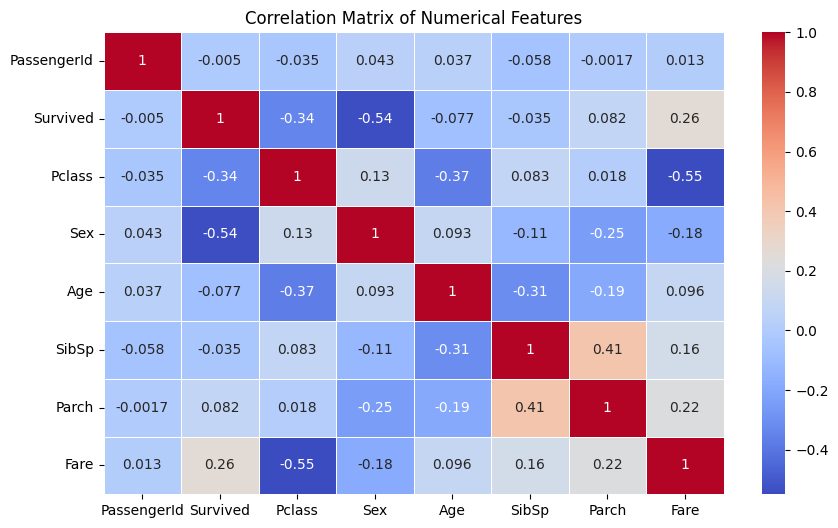

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


Scatter Plot for age, fare, Pclass, SibSp, Parch

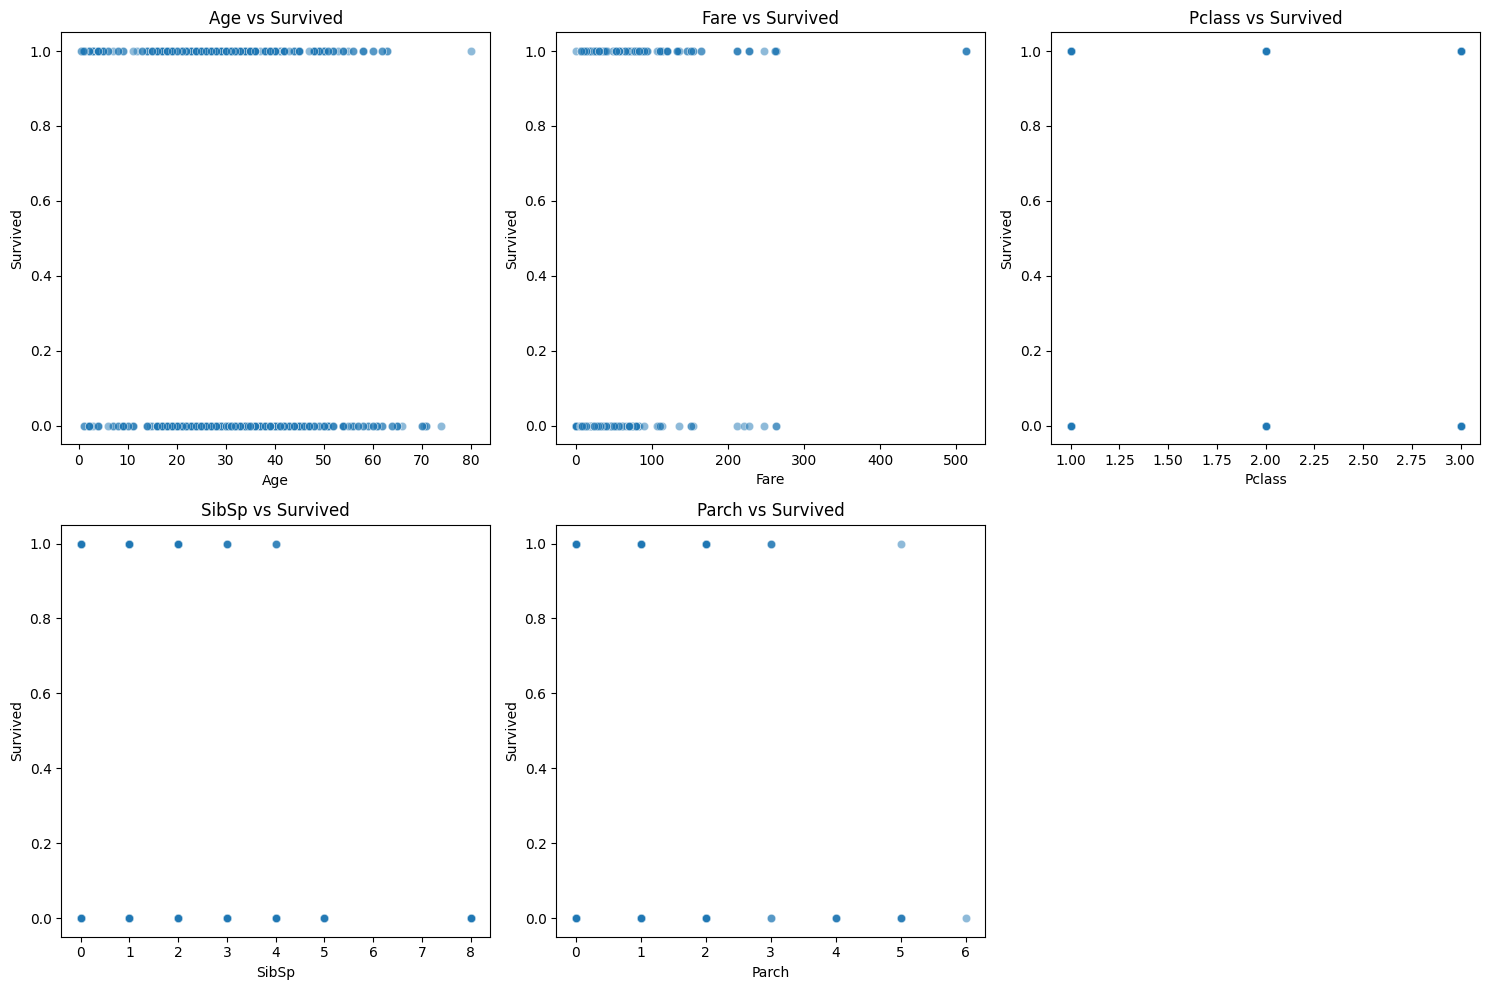

In [ ]:
# List of numerical features
num_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

# Plot scatter plots of each numerical feature vs Survived
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df, x=feature, y='Survived', alpha=0.5)
    plt.title(f'{feature} vs Survived')
plt.tight_layout()
plt.show()


Hebin Plots of survived passenger

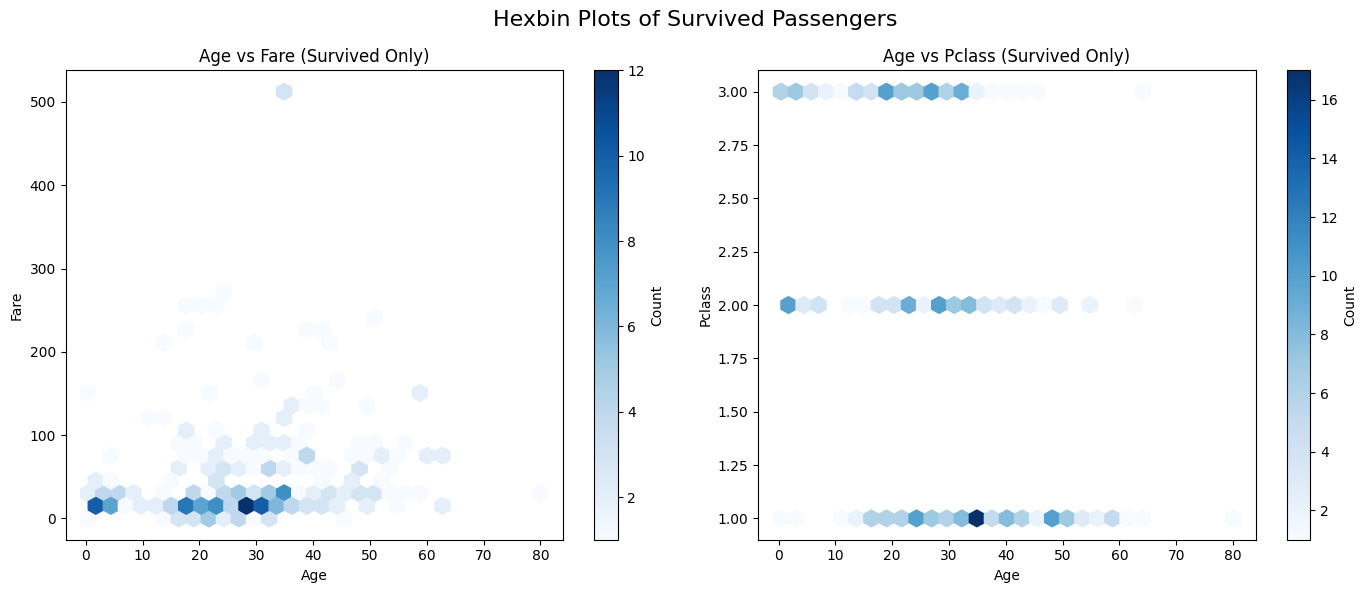

In [ ]:
import matplotlib.pyplot as plt

# Filter survived passengers
survived_df = df[df['Survived'] == 1]

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False, sharey=False)

# Hexbin Plot: Age vs Fare
hb1 = axes[0].hexbin(survived_df['Age'], survived_df['Fare'],
                     gridsize=30, cmap='Blues', mincnt=1)
axes[0].set_title('Age vs Fare (Survived Only)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Fare')
fig.colorbar(hb1, ax=axes[0], label='Count')

# Hexbin Plot: Age vs Pclass
hb2 = axes[1].hexbin(survived_df['Age'], survived_df['Pclass'],
                     gridsize=30, cmap='Blues', mincnt=1)
axes[1].set_title('Age vs Pclass (Survived Only)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Pclass')
fig.colorbar(hb2, ax=axes[1], label='Count')

# Final layout
fig.suptitle('Hexbin Plots of Survived Passengers', fontsize=16)
plt.tight_layout()
plt.show()


Survived Disturbution Base on Age and Fare

In [ ]:
import plotly.express as px

# Map survival status to string labels
df['Survival Status'] = df['Survived'].map({0: 'Not Survived', 1: 'Survived'})

# Create scatter plot
fig = px.scatter(
    df,
    x='Age',
    y='Fare',
    color='Survival Status',
    color_discrete_map={
        'Survived': 'green',
        'Not Survived': 'red'
    },
    title='Survival Distribution Based on Age and Fare',
    labels={'Age': 'Age', 'Fare': 'Fare'},
    opacity=0.7
)

fig.show()


visualize gender-based survival

Calculate percentage survival by gender

In [ ]:
# Calculate percentage survival by gender
survival_by_gender = df.groupby(['Sex', 'Survived']).size().unstack()
percentages = survival_by_gender.div(survival_by_gender.sum(axis=1), axis=0) * 100
print(percentages)


Survived          0          1
Sex                           
0         25.796178  74.203822
1         81.109185  18.890815


Survival Rate by Family Size

<ipython-input-42-652dda88363e>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




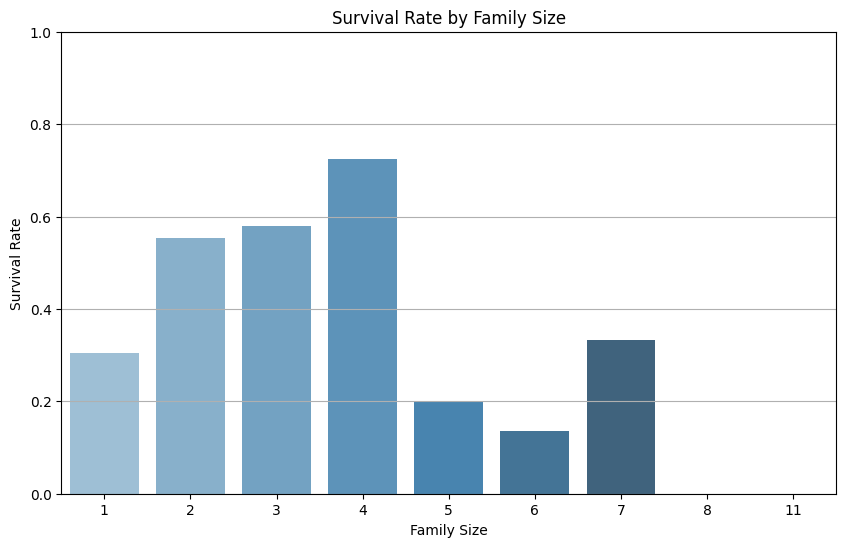

In [ ]:
# Create a new column 'FamilySize' by summing 'SibSp' and 'Parch' and adding 1 (for the passenger themself)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Group by FamilySize and calculate survival rate
family_survival_rate = df.groupby('FamilySize')['Survived'].mean().reset_index()

# Plot survival rate vs. family size
plt.figure(figsize=(10, 6))
sns.barplot(data=family_survival_rate, x='FamilySize', y='Survived', palette='Blues_d')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


Survival Rate: Alone vs With Family

<ipython-input-43-6dc1349ecb5e>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




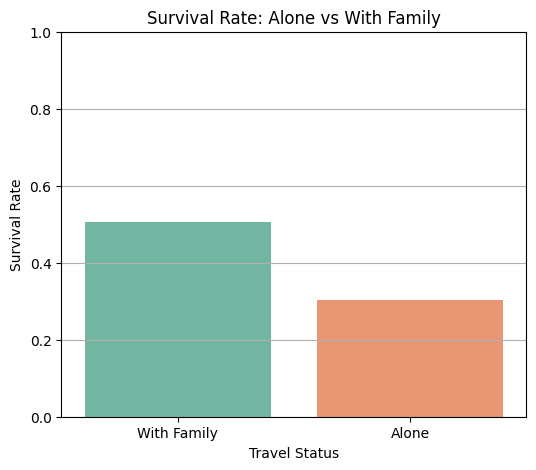

In [ ]:
# Load dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")

# Create 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch']

# Create a new feature 'IsAlone'
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 0 else 0)

# Group by 'IsAlone' and calculate survival rate
alone_survival = df.groupby('IsAlone')['Survived'].mean().reset_index()

# Map values for clarity
alone_survival['IsAlone'] = alone_survival['IsAlone'].map({1: 'Alone', 0: 'With Family'})

# Plot survival rate
plt.figure(figsize=(6, 5))
sns.barplot(data=alone_survival, x='IsAlone', y='Survived', palette='Set2')
plt.title('Survival Rate: Alone vs With Family')
plt.ylabel('Survival Rate')
plt.xlabel('Travel Status')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


Survival Rate by Age Group

In [ ]:
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


AgeGroup
Young Adult    366
Adult          209
Child           68
Teen            45
Elderly         26
Name: count, dtype: int64


<ipython-input-108-90ad7802b5b7>:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-108-90ad7802b5b7>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




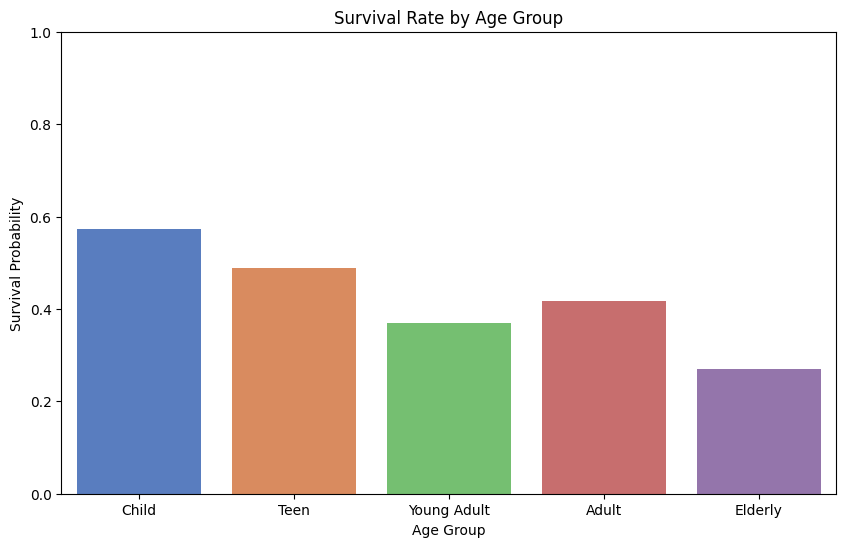

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Remove rows with missing age values
df = df[df["Age"].notnull()]

# Define age bins and labels
bins = [0, 12, 18, 35, 60, 100]
labels = ["Child", "Teen", "Young Adult", "Adult", "Elderly"]

# Create a new column for age group
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# Check the count in each group (optional)
print(df["AgeGroup"].value_counts())

# Calculate survival rate by age group
agegroup_survival = df.groupby("AgeGroup")["Survived"].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="AgeGroup", y="Survived", data=agegroup_survival, palette="muted")
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Probability")
plt.ylim(0, 1)
plt.show()


Section 2: Data Preprocessing

Missing Values Percentage

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

# Count of missing values in each column
missing_counts = df.isnull().sum()

# Percentage of missing values in each column
missing_percent = (missing_counts / len(df)) * 100

# Combine and display
missing_data = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percent
})

print(missing_data[missing_data['Missing Values'] > 0])
df.head()

          Missing Values  Percentage (%)
Age                  177       19.865320
Cabin                687       77.104377
Embarked               2        0.224467


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')


removing any rows in the DataFrame that contain at least one missing (NaN) value.

In [ ]:
df_dropna = df.dropna()
print("Shape after dropping rows with missing values:", df_dropna.shape)
df_dropna.head()

Shape after dropping rows with missing values: (183, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


filling the missing values (NaN) in the columns of df_median_fill with the median value of the columns.

In [ ]:
# Fill Age column (as it's numeric and has missing values)
df_median_fill = df.copy()
df_median_fill['Age'].fillna(df_median_fill['Age'].median(), inplace=True)


<ipython-input-68-3ceeac57df40>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





filling missing values in a categorical column using the most frequent value (mode).

In [ ]:
# Fill Embarked column (categorical)
df_mode_fill = df.copy()
df_mode_fill['Embarked'].fillna(df_mode_fill['Embarked'].mode()[0], inplace=True)
df_mode_fill.head()

<ipython-input-69-363684bc995c>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Drop unnecessary or mostly empty columns
df_cleaned = df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'])

# Show new shape and columns
print("Remaining columns:", df_cleaned.columns.tolist())
print("New shape:", df_cleaned.shape)
df_cleaned.head()

Remaining columns: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
New shape: (891, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_cleaned['Sex'] = le.fit_transform(df['Sex'])  # 'male' → 1, 'female' → 0
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


One-Hot Encoding

In [ ]:
df_one_hot = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df_one_hot.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,True


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df_final = pd.read_csv('/content/Titanic-Dataset.csv')

# Drop columns that are not useful for modeling
df_final = df_final.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Handle missing values
df_final['Age'] = df_final['Age'].fillna(df_final['Age'].median())  # Fill Age with median
df_final['Embarked'] = df_final['Embarked'].fillna(df_final['Embarked'].mode()[0])  # Fill Embarked with mode

# Encode 'Sex' using LabelEncoder (binary feature)
le = LabelEncoder()
df_final['Sex'] = le.fit_transform(df_final['Sex'])  # 'male' → 1, 'female' → 0

# One-hot encode 'Embarked'
df_final = pd.get_dummies(df_final, columns=['Embarked'], drop_first=True)

# Standardize numerical features: Age and Fare
scaler = StandardScaler()
df_final[['Age', 'Fare']] = scaler.fit_transform(df_final[['Age', 'Fare']])

# Final dataset is ready
df_final.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,-0.565736,1,0,-0.502445,False,True
1,1,1,0,0.663861,1,0,0.786845,False,False
2,1,3,0,-0.258337,0,0,-0.488854,False,True
3,1,1,0,0.433312,1,0,0.420730,False,True
4,0,3,1,0.433312,0,0,-0.486337,False,True


Split Data for Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

X = df_final.drop('Survived', axis=1)  # Features
y = df_final['Survived']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Lasso Regression (L1 Regularization)

In [ ]:
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('/content/Titanic-Dataset.csv')

lasso_model = LogisticRegression(penalty='l1', solver='liblinear')  # 'liblinear' supports L1
lasso_model.fit(X_train, y_train)

# Get the coefficients
lasso_coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_[0]
})
lasso_coeffs.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
5,Fare,0.137808
6,Embarked_Q,0.000000
4,Parch,-0.095172
3,SibSp,-0.290652
7,Embarked_S,-0.300057
2,Age,-0.373848
0,Pclass,-0.901181
1,Sex,-2.607143


Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)

# Features selected
selected_features = X.columns[rfe.support_]
print("Selected by RFE:", list(selected_features))


Selected by RFE: ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked_S']


final feature set

In [ ]:
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked_S']
X_selected = df_final[selected_features]


Model evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Select final features
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked_S']
X_selected = df_final[selected_features]
y = df_final['Survived']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate using confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[89 16]
 [19 55]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



Draw the ROC curve and compute the AUC value to evaluate model performance

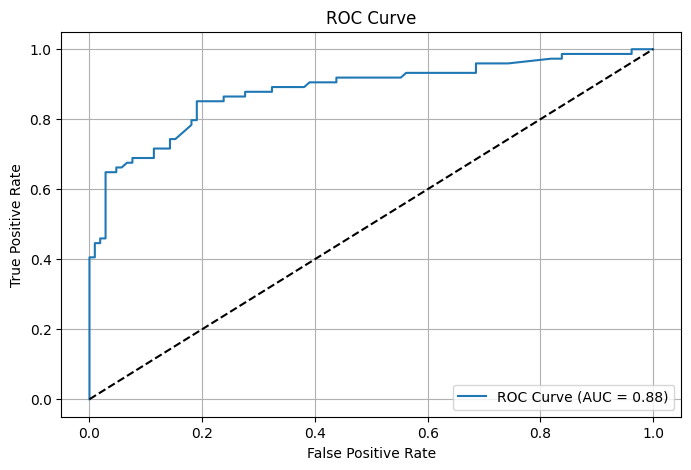

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (survived)
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


1.  multinomial logistic regression
2.  one-vs-rest logistic regression

In [ ]:
	# Predict survival probabilities
	y_probs = model.predict_proba(X_selected)[:, 1]

	# Create 3-class survival labels based on thresholds
	import numpy as np
	survival_class = np.where(y_probs < 0.4, 0,
	np.where(y_probs < 0.7, 1, 2))

	# Check class distribution
	from collections import Counter
	print(Counter(survival_class))

	# Train/test split
	from sklearn.model_selection import train_test_split
	X_train, X_test, y_train, y_test = train_test_split(
	X_selected, survival_class, test_size=0.2, random_state=42
	)

	# Train multinomial logistic regression
	from sklearn.linear_model import LogisticRegression
	multi_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
	multi_model.fit(X_train, y_train)

	# Train one-vs-rest logistic regression
	ovr_model = LogisticRegression(multi_class='ovr', solver='liblinear')
	ovr_model.fit(X_train, y_train)

	# Evaluate both models
	from sklearn.metrics import classification_report
	print("Multinomial model:\n", classification_report(y_test, multi_model.predict(X_test)))
	print("One-vs-Rest model:\n", classification_report(y_test, ovr_model.predict(X_test)))

Counter({np.int64(0): 527, np.int64(2): 185, np.int64(1): 179})
Multinomial model:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       0.88      0.92      0.90        39
           2       1.00      0.89      0.94        44

    accuracy                           0.96       179
   macro avg       0.95      0.94      0.94       179
weighted avg       0.96      0.96      0.96       179

One-vs-Rest model:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        96
           1       0.75      0.46      0.57        39
           2       0.93      0.86      0.89        44

    accuracy                           0.85       179
   macro avg       0.84      0.78      0.79       179
weighted avg       0.84      0.85      0.83       179



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.



Calculate the coefficients of binary and multiclass logistic regression.

In [ ]:
import numpy as np
import pandas as pd

# Use the model you want to analyze
# For example: model = trained binary logistic regression
# Or: multi_model = trained multinomial logistic regression

# Get coefficients
coefficients = model.coef_[0]  # For binary or first class in multiclass

# Create DataFrame to show Feature, Coefficient, and Odds Ratio
coef_df = pd.DataFrame({
    "Feature": X_selected.columns,
    "Coefficient": coefficients,
    "Odds Ratio": np.exp(coefficients)
})

# Sort by absolute value of coefficient to see most impactful features first
coef_df = coef_df.reindex(coef_df["Coefficient"].abs().sort_values(ascending=False).index)

# Display the table
print(coef_df)


      Feature  Coefficient  Odds Ratio
1         Sex    -2.558164    0.077447
0      Pclass    -1.024444    0.358996
4  Embarked_S    -0.420999    0.656390
2         Age    -0.391774    0.675857
3       SibSp    -0.298451    0.741967
